In [40]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import plotly as py 
import plotly.graph_objs as go
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

#update the filepath acoording to your file location
filepath = 'WTI_18612018.csv'

ts =pd.read_csv(filepath, parse_dates=['Year'], index_col=False ,usecols = [0,1,2]).dropna()




col_mask=ts.isnull().any(axis=1)



In [66]:

input = np.log(ts.WTIAdj2018)

model = pm.auto_arima(input, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True
                      #,out_of_sample_size=40
                     )

print(model.summary())













Fit ARIMA: order=(1, 1, 1); AIC=33.047, BIC=45.272, Fit time=0.288 seconds
Fit ARIMA: order=(0, 1, 0); AIC=34.192, BIC=40.305, Fit time=0.007 seconds
Fit ARIMA: order=(1, 1, 0); AIC=32.818, BIC=41.987, Fit time=0.049 seconds
Fit ARIMA: order=(0, 1, 1); AIC=31.463, BIC=40.632, Fit time=0.045 seconds
Fit ARIMA: order=(0, 1, 2); AIC=31.387, BIC=43.612, Fit time=0.069 seconds
Fit ARIMA: order=(1, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\Z620\Anaconda3\envs\Udacity\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Z620\Anaconda3\envs\Udacity\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Z620\Anaconda3\envs\Udacity\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array i

Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 3); AIC=28.538, BIC=43.819, Fit time=0.124 seconds
Total fit time: 0.648 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  157
Model:                 ARIMA(0, 1, 3)   Log Likelihood                  -9.269
Method:                       css-mle   S.D. of innovations              0.257
Date:                Thu, 13 Jun 2019   AIC                             28.538
Time:                        15:37:57   BIC                             43.819
Sample:                             1   HQIC                            34.744
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0069      0.016      

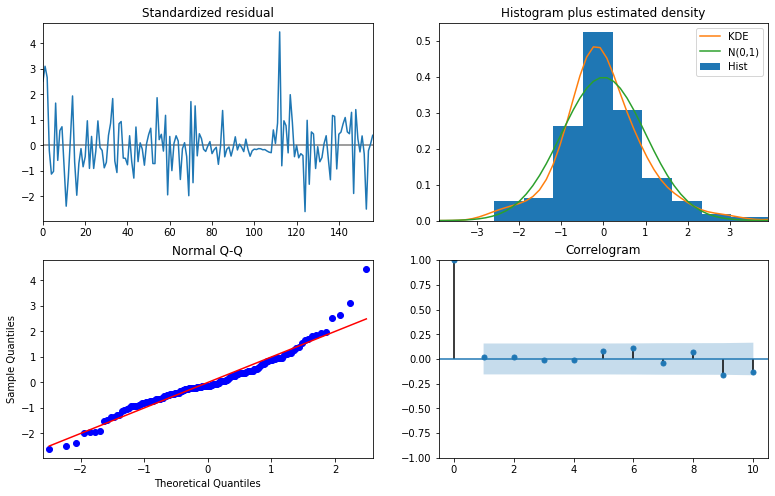

In [55]:
model.plot_diagnostics(figsize=(13,8))
plt.show()

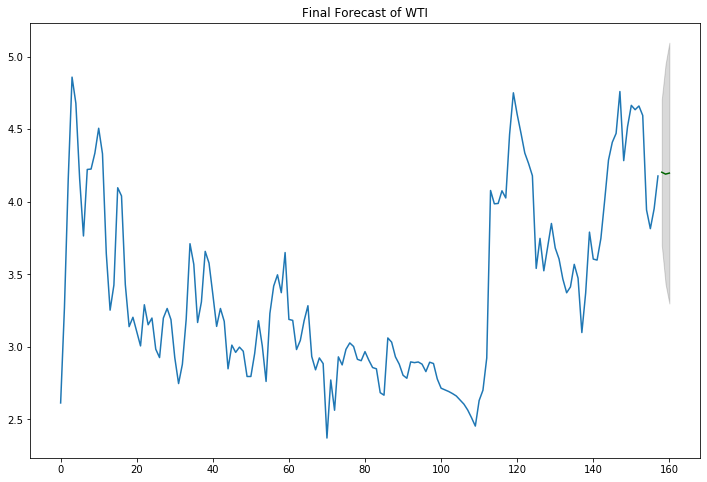

In [70]:
# Forecast
n_periods = 3
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(input), len(input)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure (figsize=(12,8))
plt.plot(input)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WTI")
plt.show()

In [71]:
input = ts.WTIAdj2018


model = pm.auto_arima(input, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True
                      #,out_of_sample_size=40
                     )

print(model.summary())

Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=1258.065, BIC=1264.177, Fit time=0.006 seconds
Fit ARIMA: order=(1, 1, 0); AIC=1256.956, BIC=1266.125, Fit time=0.027 seconds
Fit ARIMA: order=(0, 1, 1); AIC=1254.758, BIC=1263.927, Fit time=0.040 seconds
Fit ARIMA: order=(0, 1, 2); AIC=1250.615, BIC=1262.840, Fit time=0.061 seconds
Fit ARIMA: order=(1, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\Z620\Anaconda3\envs\Udacity\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Z620\Anaconda3\envs\Udacity\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Z620\Anaconda3\envs\Udacity\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array i

Fit ARIMA: order=(0, 1, 3); AIC=1247.100, BIC=1262.381, Fit time=0.117 seconds
Total fit time: 0.340 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  157
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -618.550
Method:                       css-mle   S.D. of innovations             12.430
Date:                Thu, 13 Jun 2019   AIC                           1247.100
Time:                        15:41:33   BIC                           1262.381
Sample:                             1   HQIC                          1253.306
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1768      0.671      0.263      0.793      -1.139       1.493
ma.L1.D.y      0.1123 

C:\Users\Z620\Anaconda3\envs\Udacity\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



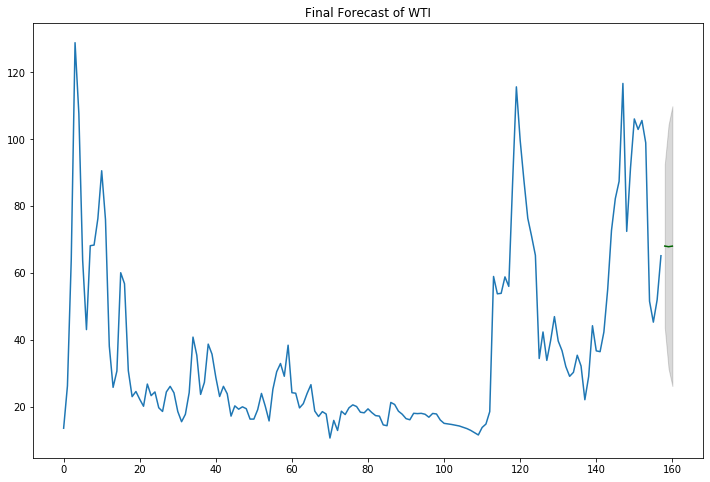

In [72]:
# Forecast
n_periods = 3
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(input), len(input)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure (figsize=(12,8))
plt.plot(input)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WTI")
plt.show()

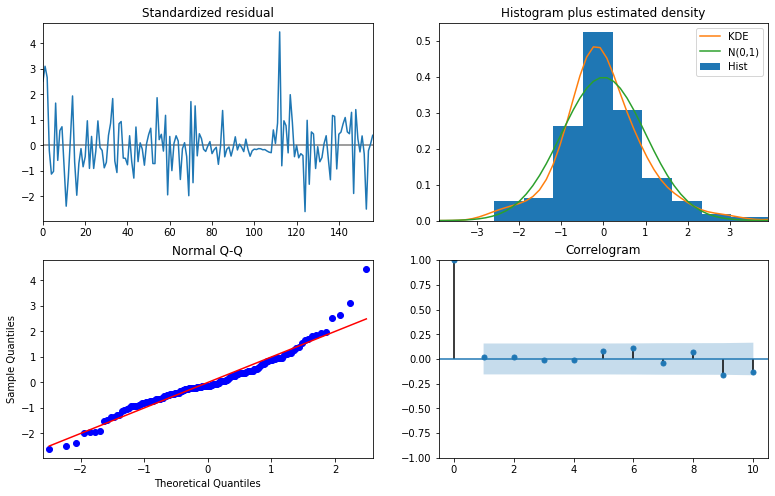

In [56]:
model.plot_diagnostics(figsize=(13,8))
plt.show()

In [73]:
input = ts.WTI


model = pm.auto_arima(input, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True
                      #,out_of_sample_size=40
                     )

print(model.summary())

Fit ARIMA: order=(1, 1, 1); AIC=1034.028, BIC=1046.253, Fit time=0.121 seconds
Fit ARIMA: order=(0, 1, 0); AIC=1033.128, BIC=1039.240, Fit time=0.006 seconds
Fit ARIMA: order=(1, 1, 0); AIC=1034.704, BIC=1043.873, Fit time=0.034 seconds
Fit ARIMA: order=(0, 1, 1); AIC=1034.627, BIC=1043.796, Fit time=0.031 seconds
Total fit time: 0.199 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  157
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -514.564
Method:                           css   S.D. of innovations              6.414
Date:                Thu, 13 Jun 2019   AIC                           1033.128
Time:                        15:42:57   BIC                           1039.240
Sample:                             1   HQIC                          1035.610
                                                                              
                 coef 

C:\Users\Z620\Anaconda3\envs\Udacity\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Z620\Anaconda3\envs\Udacity\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Z620\Anaconda3\envs\Udacity\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array i

In [81]:
input = np.log(ts.WTI)


model = pm.auto_arima(input, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True
                      #,out_of_sample_size=40
                     )

print(model.summary())

Fit ARIMA: order=(1, 1, 1); AIC=56.419, BIC=68.644, Fit time=0.136 seconds
Fit ARIMA: order=(0, 1, 0); AIC=61.942, BIC=68.054, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0); AIC=56.590, BIC=65.759, Fit time=0.037 seconds
Fit ARIMA: order=(0, 1, 1); AIC=54.550, BIC=63.718, Fit time=0.038 seconds
Fit ARIMA: order=(0, 1, 2); AIC=56.205, BIC=68.430, Fit time=0.072 seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.332 seconds


C:\Users\Z620\Anaconda3\envs\Udacity\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Z620\Anaconda3\envs\Udacity\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Z620\Anaconda3\envs\Udacity\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array i

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  157
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -24.275
Method:                       css-mle   S.D. of innovations              0.282
Date:                Thu, 13 Jun 2019   AIC                             54.550
Time:                        16:12:27   BIC                             63.718
Sample:                             1   HQIC                            58.273
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0323      0.028      1.138      0.257      -0.023       0.088
ma.L1.D.y      0.2616      0.077      3.377      0.001       0.110       0.413
                                    Roots           

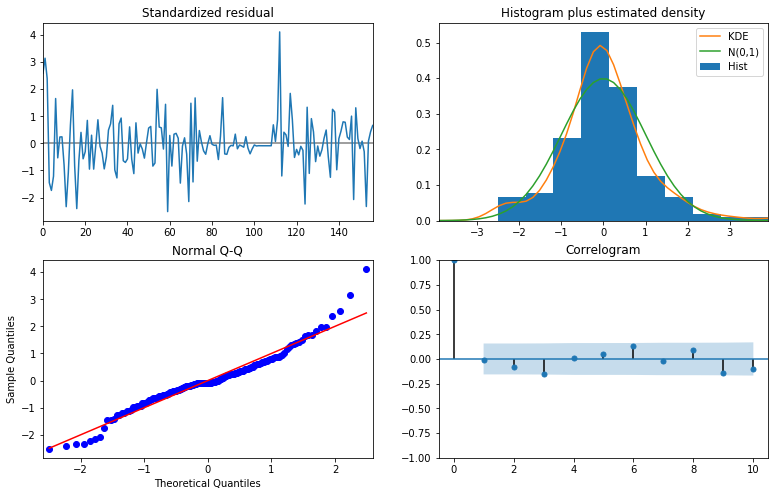

In [82]:
model.plot_diagnostics(figsize=(13,8))
plt.show()

C:\Users\Z620\Anaconda3\envs\Udacity\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



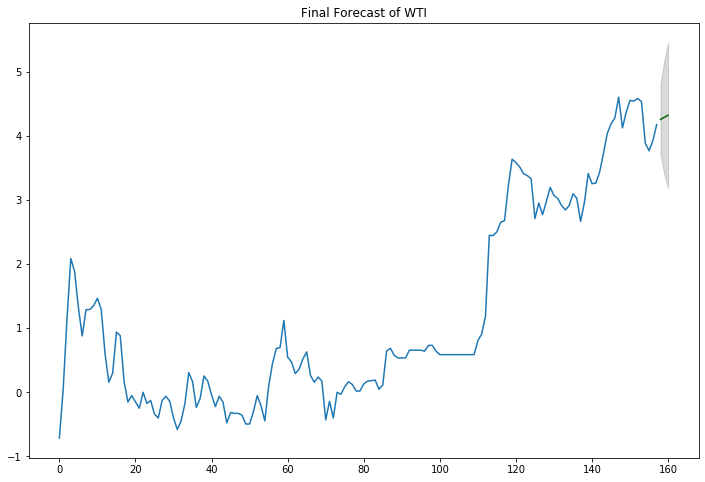

In [83]:
# Forecast
n_periods = 3
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(input), len(input)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure (figsize=(12,8))
plt.plot(input)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WTI")
plt.show()

In [87]:
from statsmodels.tsa.statespace.structural import UnobservedComponents

indpro_mod = UnobservedComponents(input,
                                  level=True,
                                  trend=True,
                                  stochastic_level=True,
                                  stochastic_trend=True)
indpro_res = indpro_mod.fit(method='powell', disp=False)
indpro_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                    WTI   No. Observations:                  158
Model:                           None   Log Likelihood                 -31.813
Date:                Thu, 13 Jun 2019   AIC                             67.626
Time:                        16:21:21   BIC                             73.725
Sample:                             0   HQIC                            70.103
                                - 158                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
sigma2.level     0.0852      0.006     14.492      0.000       0.074       0.097
sigma2.trend  8.891e-14   6.26e-05   1.42e-09      1.000      -0.000       0.000
===================================================================================
Ljung-Box (Q):                       47.69   Jarque-Bera (JB):                82.10
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.37
Prob(H) (two-sided):                  0.15   Kurtosis:                         6.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""